In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from datetime import datetime
from os import path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from cafeen import utils
mpl.style.use('ggplot')

In [8]:
path_to_train = path.join(path.abspath('..'), 'data', 'train.csv')
path_to_test = path.join(path.abspath('..'), 'data', 'test.csv')

In [4]:
train = pd.read_csv(path_to_train)

In [28]:
train['ord_5'] = train['ord_5'].str[0]
train.loc[train['ord_5'].isna(), 'ord_5'] = np.nan

In [5]:
test = pd.read_csv(path_to_test)

In [9]:
df, _ = utils.read_data()

In [10]:
summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = df.isnull().sum().values    
summary['Uniques'] = df.nunique().values
summary['First Value'] = df.iloc[0].values
summary['Second Value'] = df.iloc[1].values
summary['Third Value'] = df.iloc[2].values

for name in summary['Name'].value_counts().index:
    summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 
summary.style.background_gradient(cmap='Pastel1')

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,1000000,0,1,2,19.93
1,bin_0,float64,29795,2,0,1,0,0.45
2,bin_1,float64,30041,2,0,1,1,0.69
3,bin_2,float64,29902,2,0,0,0,0.85
4,bin_3,object,29965,2,F,F,F,0.95
5,bin_4,object,29998,2,N,Y,N,1
6,nom_0,object,30314,3,Red,Red,Red,1.31
7,nom_1,object,30103,6,Trapezoid,Star,nan,2.27
8,nom_2,object,30214,6,Hamster,Axolotl,Hamster,2.27
9,nom_3,object,30297,6,Russia,nan,Canada,2.27


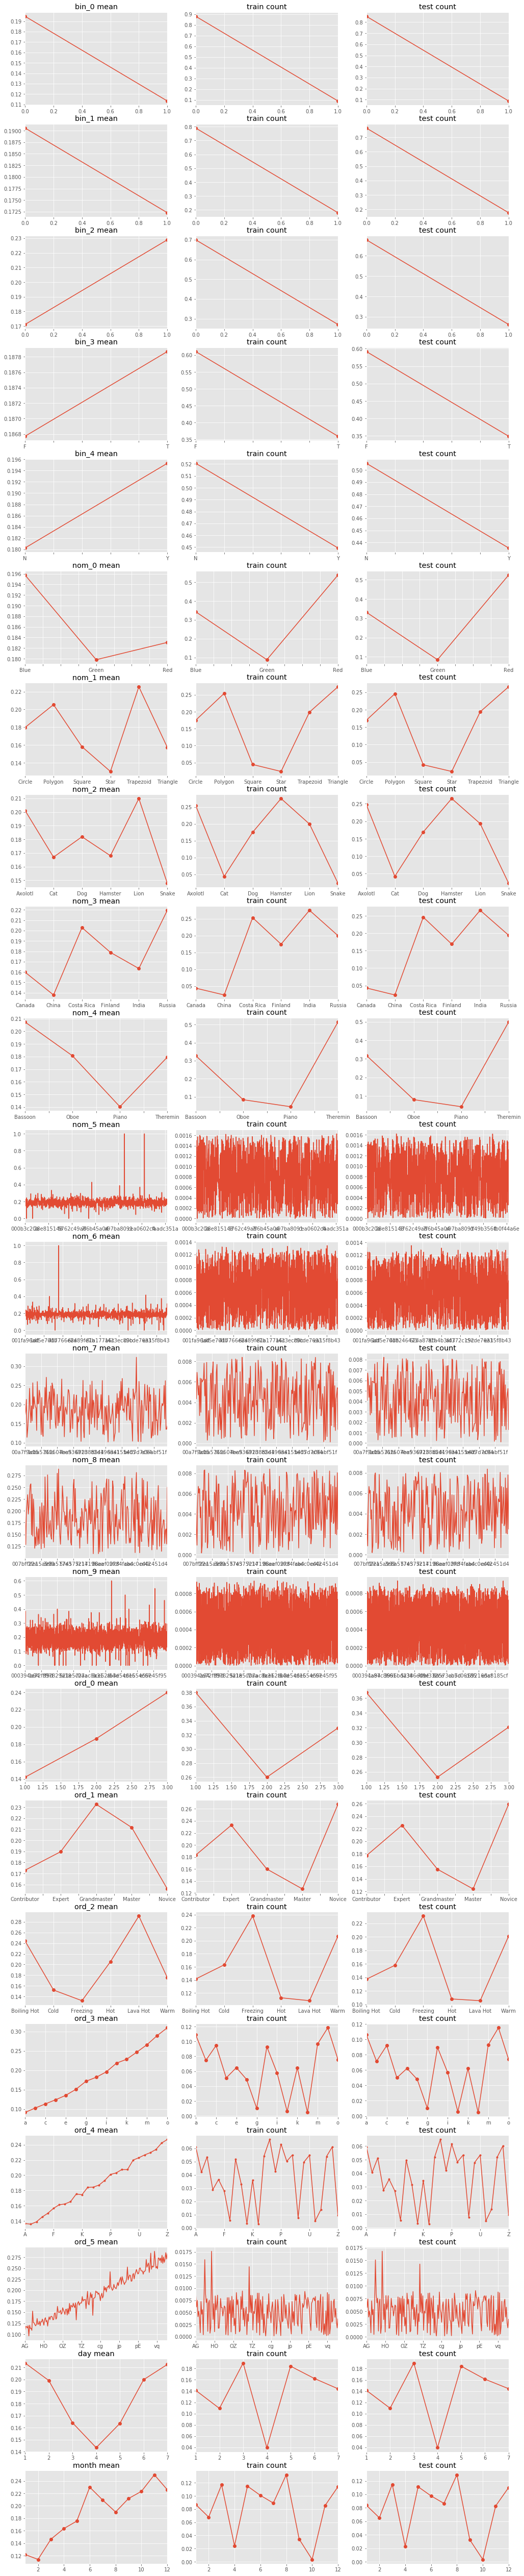

In [9]:
features = [col for col in test.columns if col not in ['id']]
nrows = len(features)
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(17,4*nrows))

for i in range(nrows):
    if train[features[i]].nunique() <= 15:
        marker = 'o'
    elif train[features[i]].nunique() <= 50:
        marker = '.'
    else:
        marker = None
        
    train_counts = train.groupby(features[i])['target'].count() / len(train)
    test_counts = test.groupby(features[i])['day'].count() / len(test)
    
    train.groupby(features[i])['target'].mean().plot(ax=ax[i, 0], marker=marker)
    train_counts.plot(ax=ax[i, 1], marker=marker)
    test_counts.plot(ax=ax[i, 2], marker=marker)
    ax[i, 0].set_title(features[i] + ' mean')
    ax[i, 1].set_title('train count')
    ax[i, 2].set_title('test count')
    
    for j in range(ncols):
        ax[i, j].set_xlabel('')

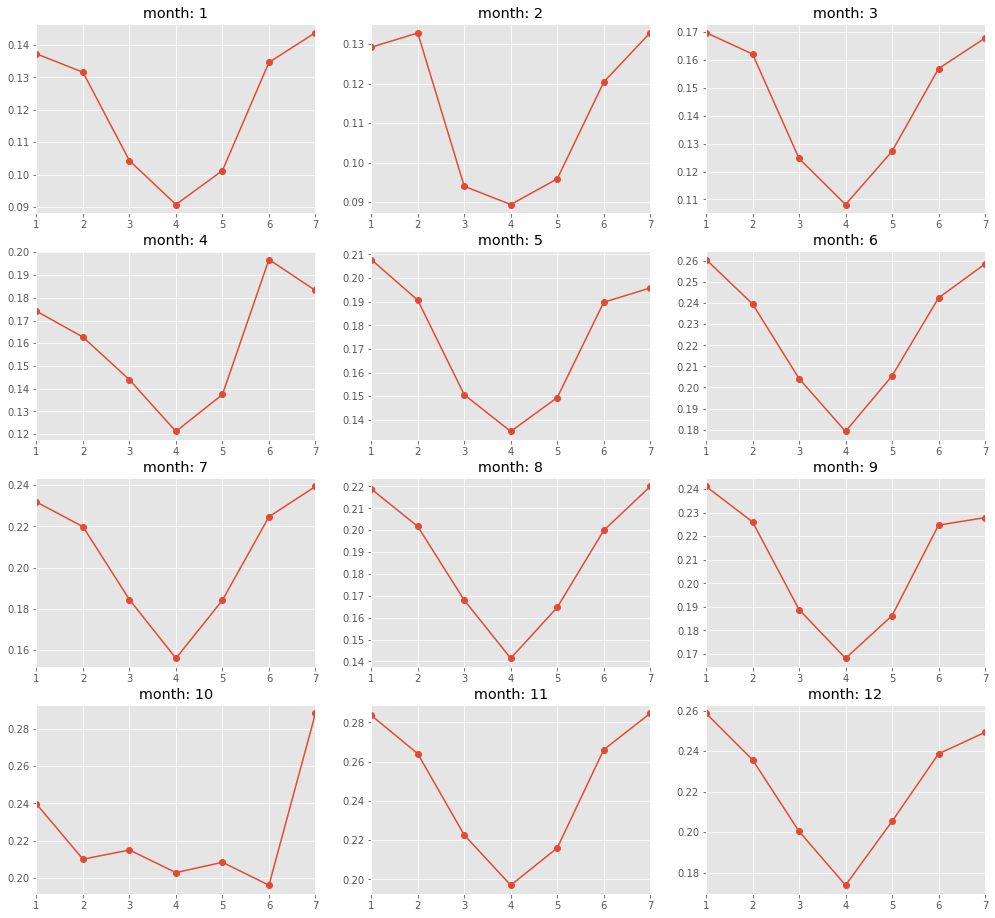

In [12]:
fig, ax = plt.subplots(4, 3, figsize=(17,16))

for i in range(12):
    train[train['month'] == i+1].groupby('day')['target'].mean().plot(ax = ax[i//3, i-3*(i//3)], marker='o')
    ax[i//3, i-3*(i//3)].set_xlabel('')
    ax[i//3, i-3*(i//3)].set_title(f'month: {i+1}')

In [5]:
from sklearn.model_selection import StratifiedKFold
from cafeen import steps
encoder = steps.Encoder()

In [6]:
features = utils.get_features(train.columns)
_train = encoder.target_encoding(train.copy(), features, na_value=np.nan)

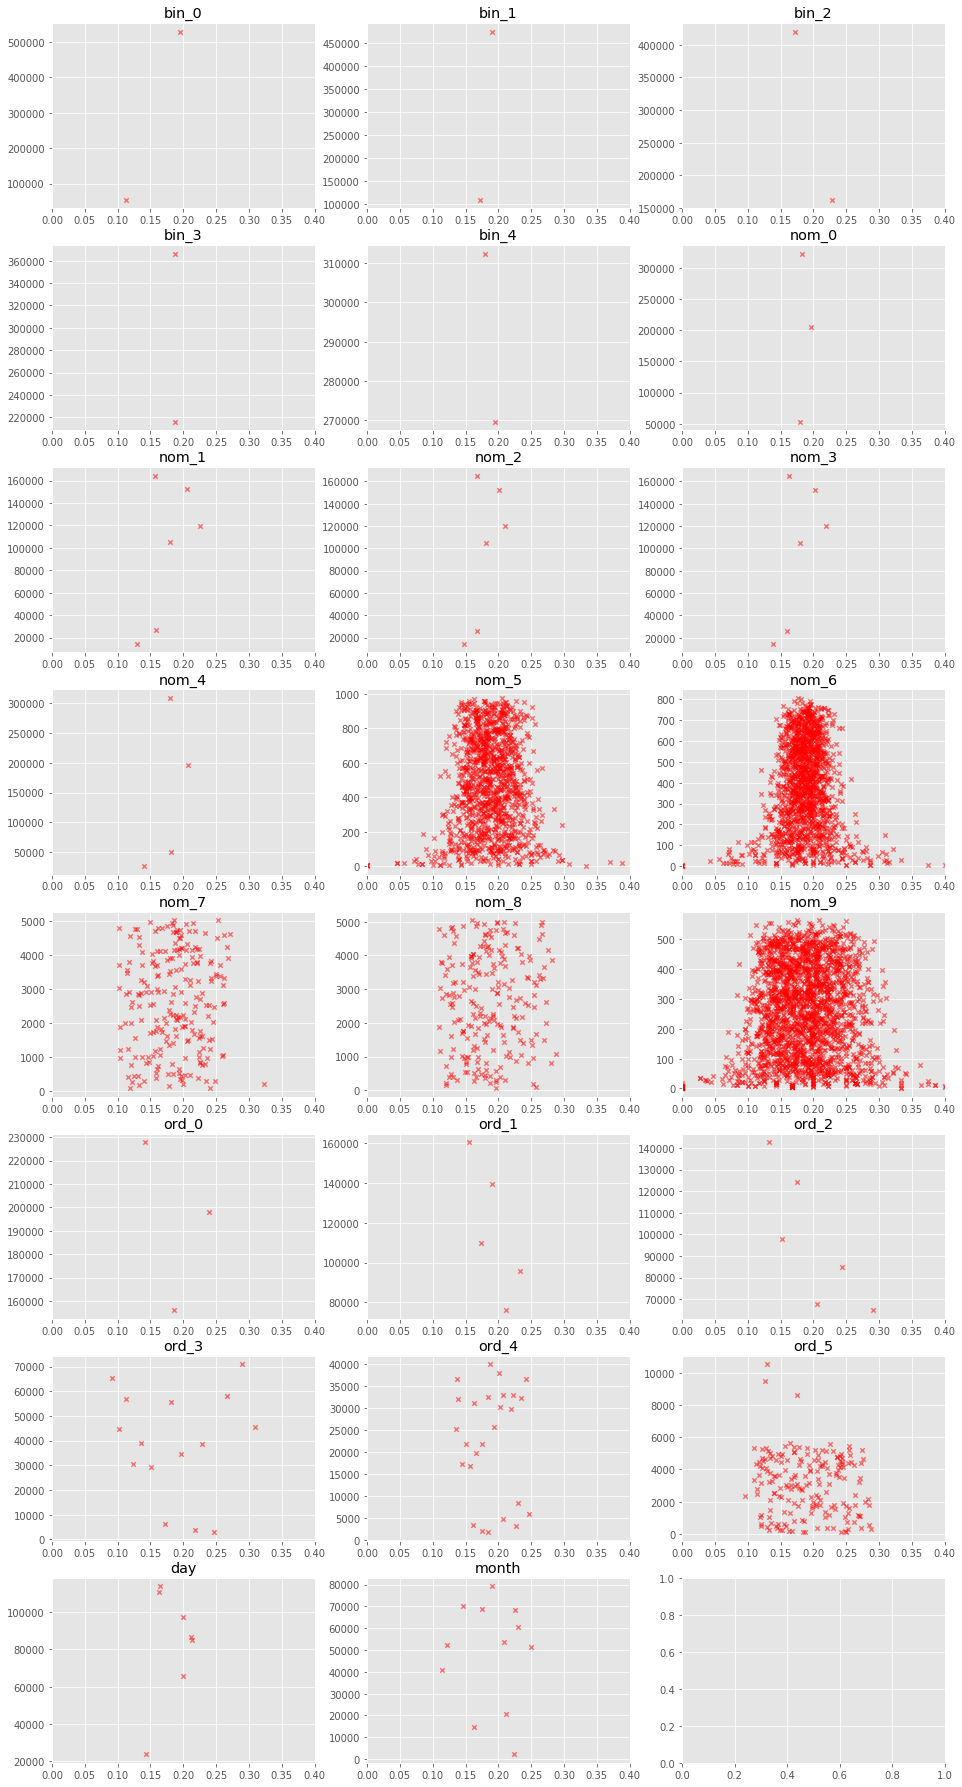

In [7]:
fig, ax = plt.subplots(8, 3, figsize=(16, 32))
for i, feature in enumerate(features):
    stat=train.groupby(feature)['target'].agg(['count', 'mean'])
    stat.plot(x='mean', y='count', kind='scatter', 
              ax=ax[i//3][i%3], color='r', alpha=0.5, marker='x')
    ax[i//3][i%3].set_xlim([0, 0.4])
    ax[i//3][i%3].set_xlabel('')
    ax[i//3][i%3].set_ylabel('')
    ax[i//3][i%3].set_title(feature)

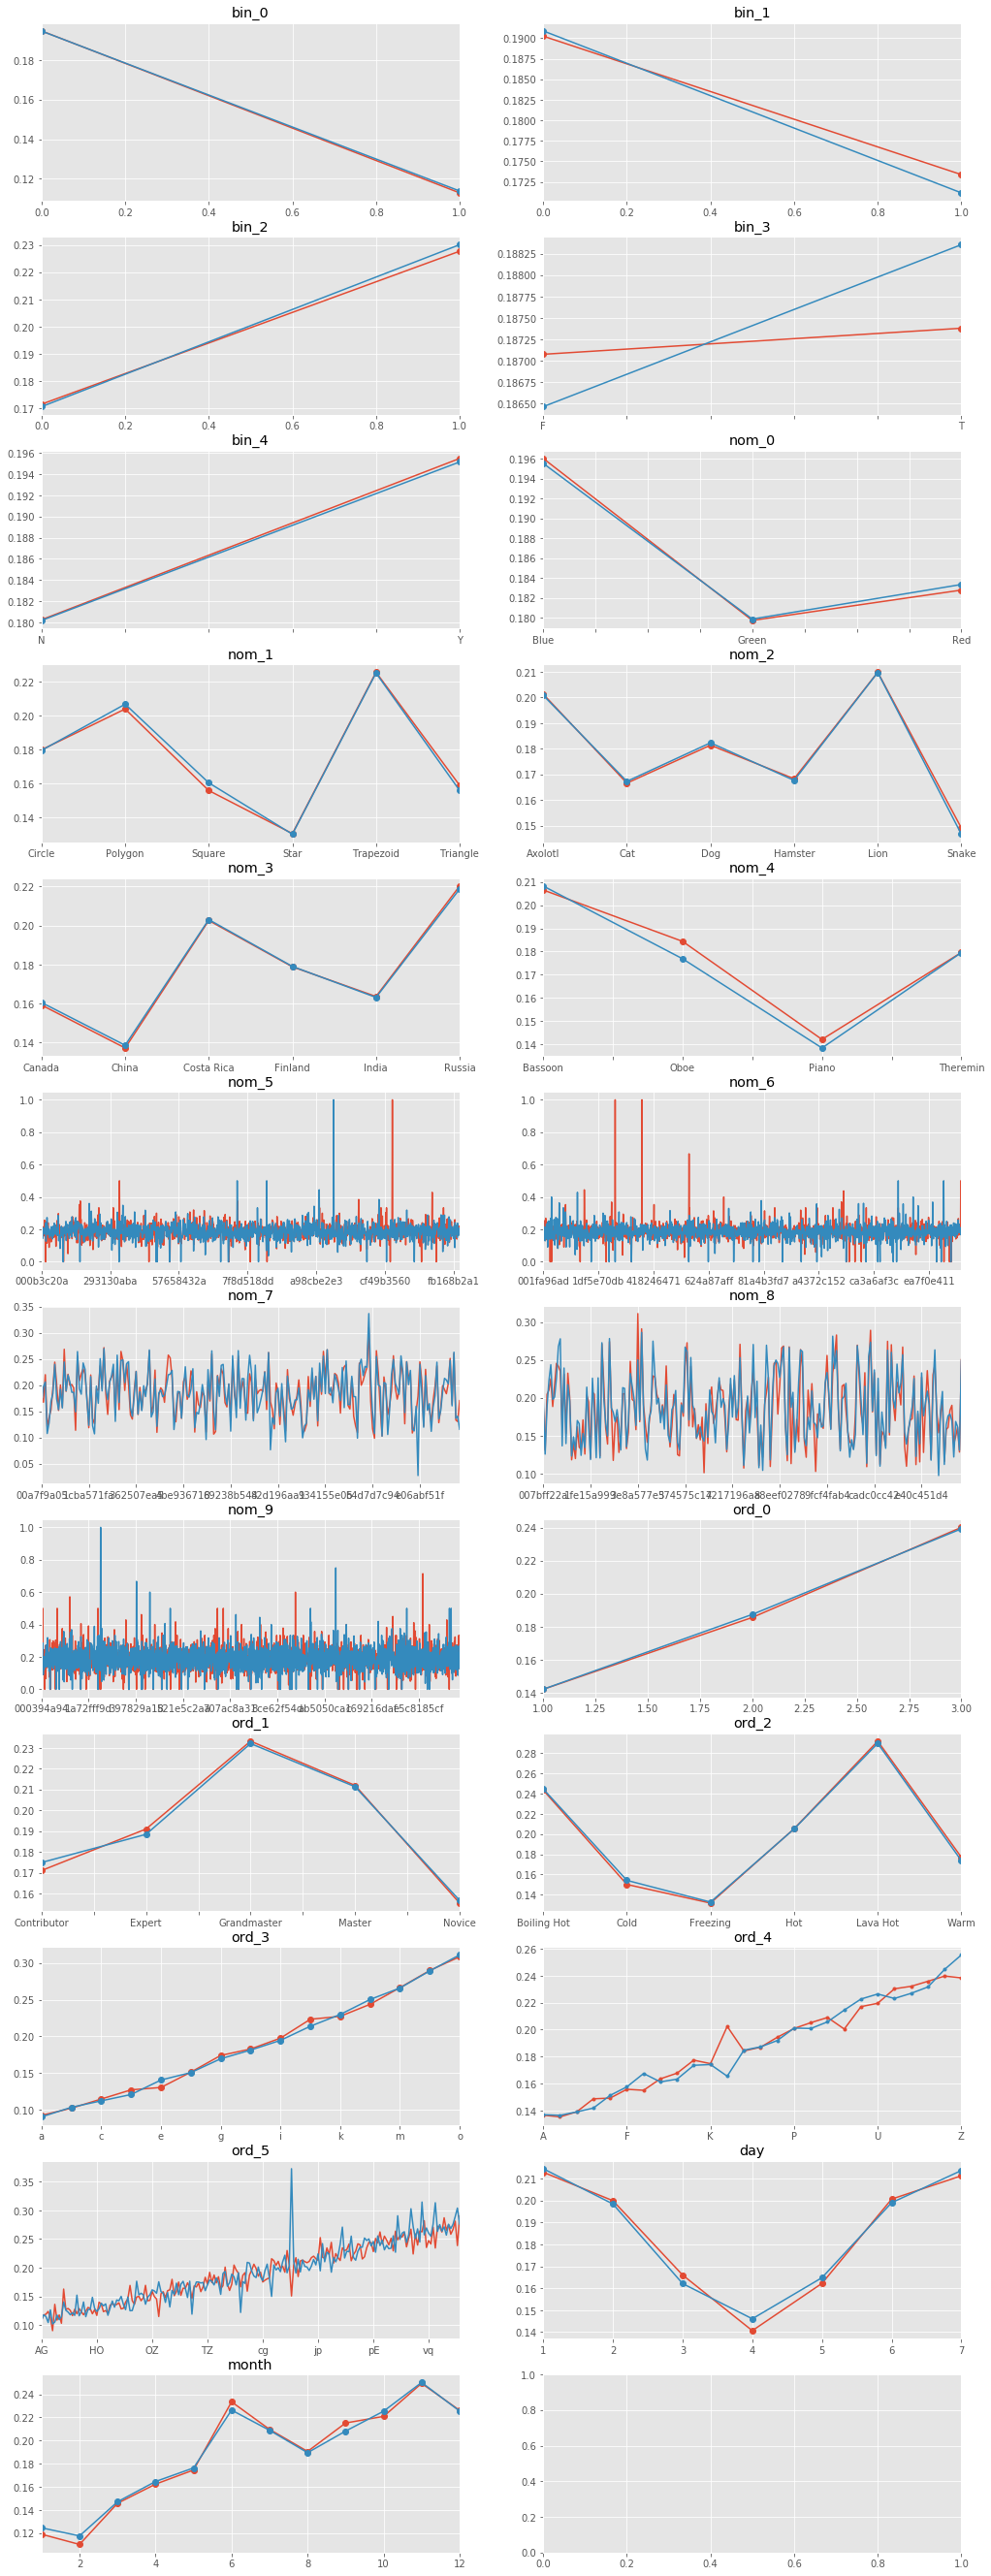

In [17]:
train, valid = utils.read_data(valid_rows=300000, drop=False)
train = train[train['target'] > -1 ]

features = utils.get_features(train.columns)
nrows = len(features) // 2 + 1
ncols = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(17,4*nrows))

for i in range(len(features)):
    if train[features[i]].nunique() <= 15:
        marker = 'o'
    elif train[features[i]].nunique() <= 50:
        marker = '.'
    else:
        marker = None
    
    j = i // 2
    k = i % 2
    
    train.groupby(features[i])['target'].mean().plot(ax=ax[j, k], marker=marker)
    valid.groupby(features[i])['y_true'].mean().plot(ax=ax[j, k], marker=marker)
    ax[j, k].set_title(features[i])    
    ax[j, k].set_xlabel('')